In [1]:
# Importing suitable libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Initializing the dataset
data = pd.read_csv(
    "/home/amandeep/Documents/DataAnalysis/dataset/archive/winequality.csv"
)

## Now we are gonna do is remove our outliers using IQR Method

### - Trimming

### - Capping


<Axes: xlabel='volatile acidity', ylabel='Density'>

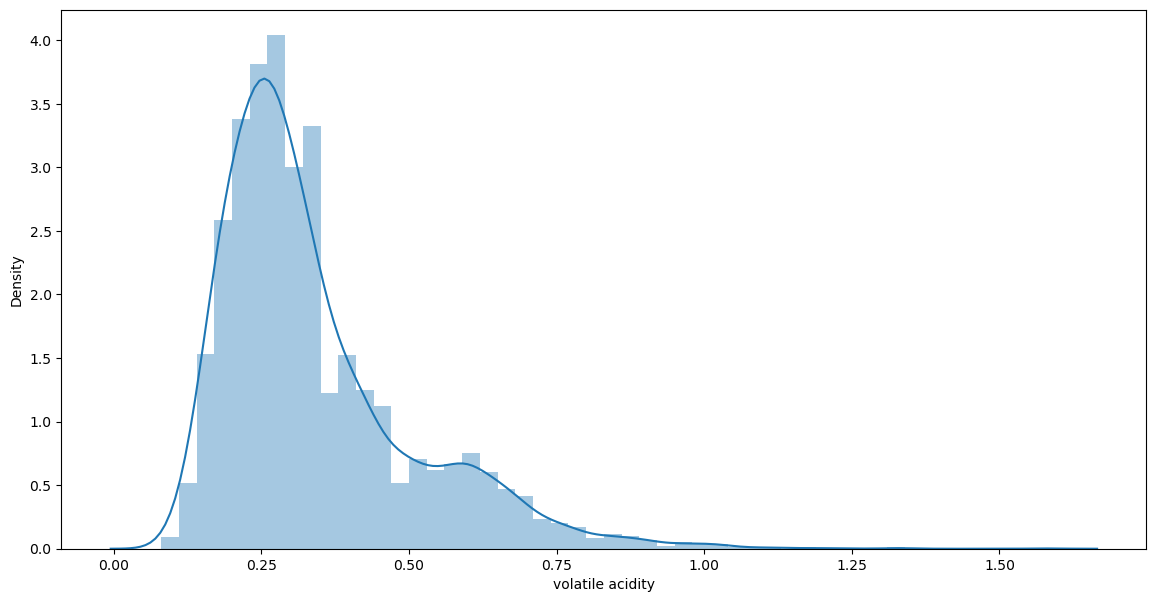

In [3]:
plt.figure(figsize=(14, 7))

sns.distplot(data["volatile acidity"])

<Axes: >

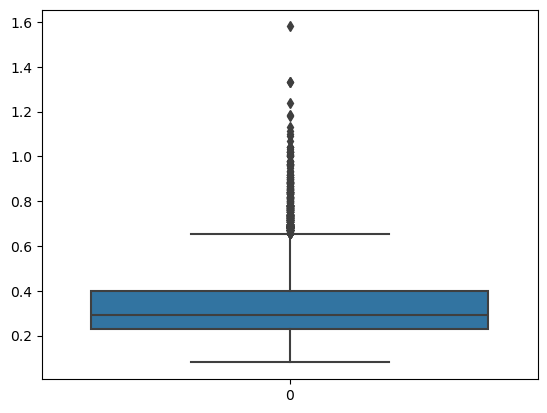

In [4]:
sns.boxplot(data["volatile acidity"])

### So now we will define the upperlimit and the lower limit so that we can either trim them of cap them


In [5]:
newData = data.copy()

In [6]:
q1 = newData["volatile acidity"].quantile(0.25)
q3 = newData["volatile acidity"].quantile(0.75)

In [7]:
iqr = q3 - q1

In [8]:
q1, q3, iqr

(0.23, 0.4, 0.17)

In [9]:
UpperLimit = q3 + (1.5 * iqr)
LowerLimit = q1 - (1.5 * iqr)
print("Upper Limit: ", UpperLimit)
print("Lower limit: ", LowerLimit)

Upper Limit:  0.655
Lower limit:  -0.024999999999999994


# Trimming the data

In [10]:
newDataOne = data.loc[(data['volatile acidity'] < UpperLimit) & (data['volatile acidity'] > LowerLimit)]

<Axes: >

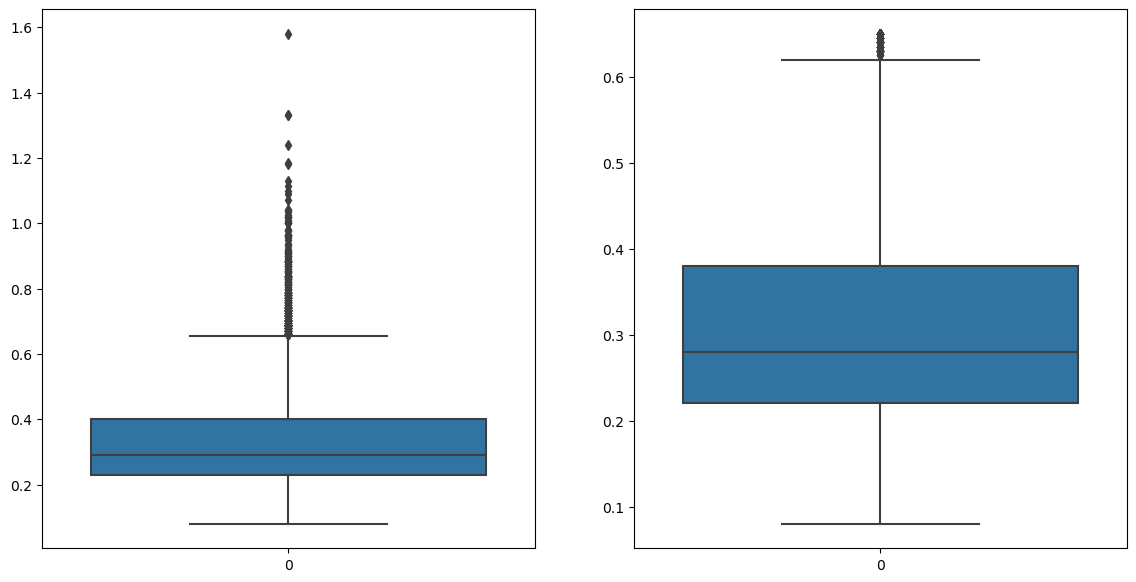

In [13]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data['volatile acidity'])

plt.subplot(1, 2, 2)
sns.boxplot(newDataOne['volatile acidity'])

# Capping the data

In [14]:
newData.loc[newData['volatile acidity'] > UpperLimit] = UpperLimit
newData.loc[newData['volatile acidity'] < LowerLimit] = LowerLimit

<Axes: >

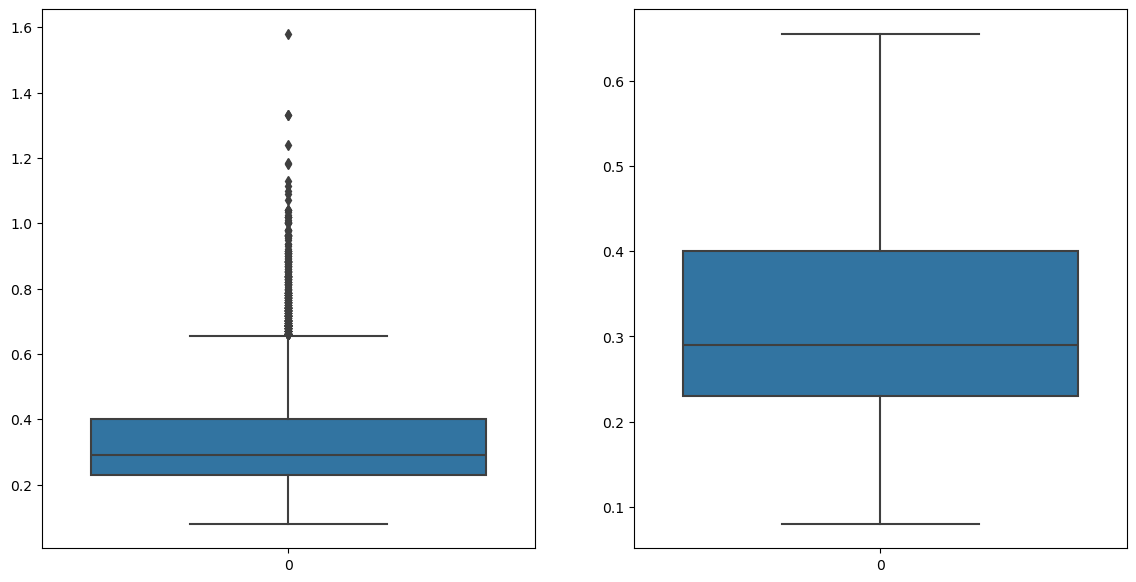

In [15]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data['volatile acidity'])

plt.subplot(1, 2, 2)
sns.boxplot(newData['volatile acidity'])

## Now we can see that we have treated the outliers very well with IQR Method and capping the data from upper limit and lower limit